# Lab 4

Ali Tejani, amt3639

Caroline Yao

## Problem 1: PCA

### 1. Plot two 3D multivariate distributions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# randomly sample distributions 20 times each
cov1 = [[.5,0,0],[0,.5,0],[0,0,0.7]]
cov2 = [[.5,0,0],[0,.5,0],[0,0,0.01]]
p1 = np.random.multivariate_normal([0,0,0],cov1,20)
p2 = np.random.multivariate_normal([1,1,1],cov2,20)

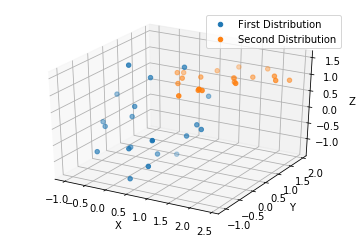

In [4]:
# plot on 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p1[:,0],p1[:,1],p1[:,2],label='First Distribution')
ax.scatter(p2[:,0],p2[:,1],p2[:,2],label='Second Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

### 2. What do the points look like?

The distributions are centered around two different points: (0,0,0) and (1,1,1). The first distribution has a greater range of Z values than the second, which seems almost flat. Other than this, the distributions look vaguely similar in the X and Y directions. The first distribution looks like a ball in space and the second looks like a disk

### 3. Covariance of the new set

In [10]:
# this might be right
newP = np.concatenate((p1,p2))
print "Actual Covariance Matrix"
print np.cov(newP.T)
mean = np.mean(newP, axis=0)
norm = newP - mean
print "Calculated Covariance Matrix"
covXY = np.dot(norm.T,norm)/(40-1)
print covXY

Actual Covariance Matrix
[[ 0.71878016  0.36177087  0.2849218 ]
 [ 0.36177087  0.65190386  0.42168347]
 [ 0.2849218   0.42168347  0.62379056]]
Calculated Covariance Matrix
[[ 0.71878016  0.36177087  0.2849218 ]
 [ 0.36177087  0.65190386  0.42168347]
 [ 0.2849218   0.42168347  0.62379056]]


### 4. PCA with rank 2

In [11]:
w,v = np.linalg.eig(covXY)
a = np.argsort(w)[-2:]
v1 = v[:,a[0]]
v2 = v[:,a[1]]

## Problem 2: Low rank approximation of Mona Lisa

2


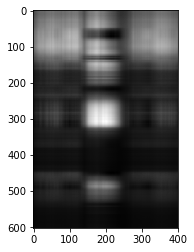

5


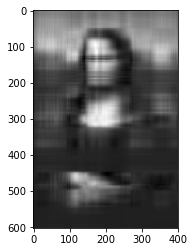

10


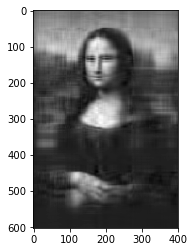

In [16]:
from PIL import Image
img = np.array(Image.open('inputs/mona_lisa.png'))
img = img[:,:,0]*256+img[:,:,1]
u, s, v = np.linalg.svd(img,full_matrices=False)
for k in [2,5,10]:
    s2 = s.copy()
    s2[k:] = 0
    print int(k)
    lowRankImg = np.dot(np.dot(u, np.diag(s2)), v)
    plt.gray()
    plt.imshow(lowRankImg)
    plt.show()
#     print X1

## Problem 3: Using Low Rank Structure for Corrupted Entries

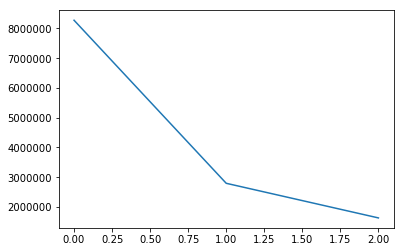

In [605]:
corrMat1 = np.genfromtxt('inputs/CorrMat1.csv', delimiter=',')
U, d, Vt = linalg.svd(img,full_matrices=False)
plt.plot(d[:3])
# d[:50]
